# Tech Challenge #1

Desenvoler um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde

**Dataset**:

Medical Insurance Costs on #kaggle

https://www.kaggle.com/datasets/joebeachcapital/medical-insurance-costs?utm_medium=social&utm_campaign=kaggle-dataset-share&utm_source=twitter

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from scipy.stats import shapiro
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
def generate_scatter_plot(x, y, xlabel, ylabel, predict=[]):
  plt.scatter(x, y, label="Real")
  if len(predict) > 0: plt.scatter(x, predict, color="red", label='Previsto')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()
  plt.show()

# Exploração de dados


*   Carregue a base de dados e explore suas características
*   Analise estatísticas descritivas e visualize distribuições relevantes




In [ ]:
#Carregando dados e visualização de algumas linhas do dataset
data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#Exibindo informações sobre os tipos de dados que compõe o dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


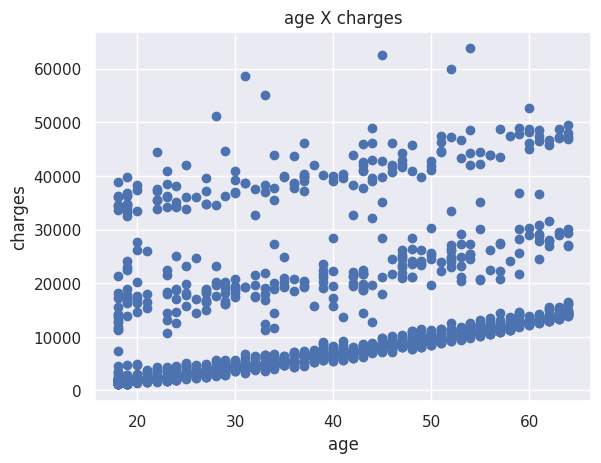

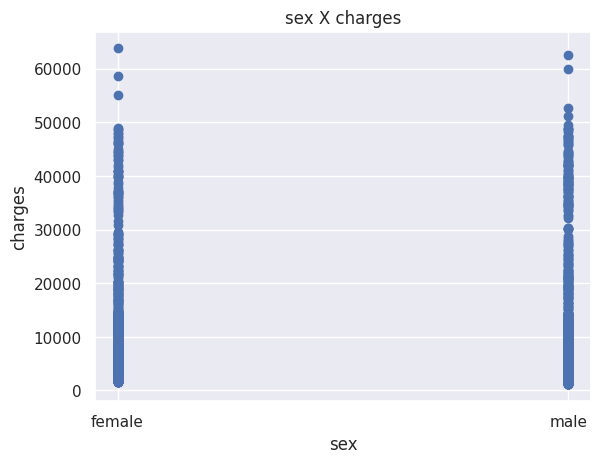

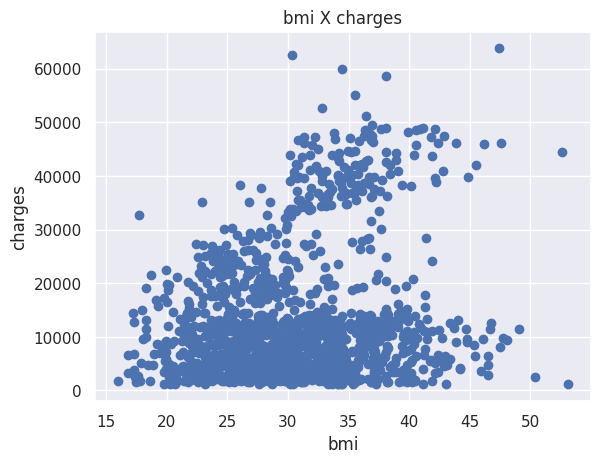

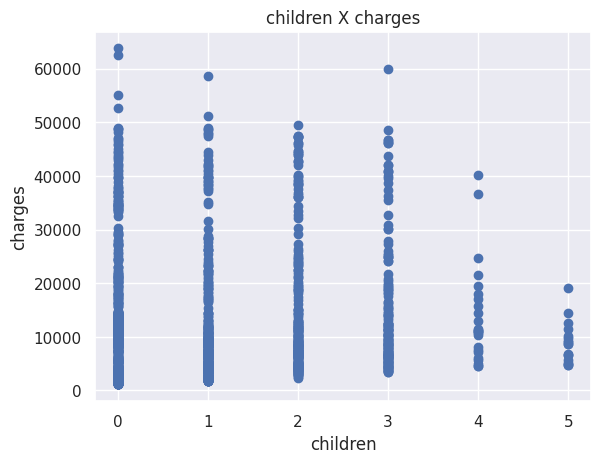

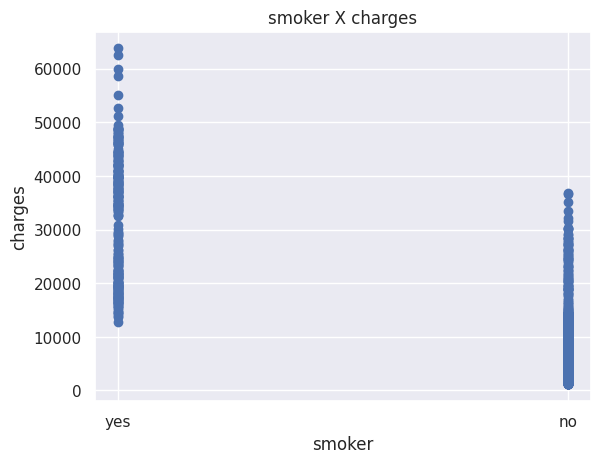

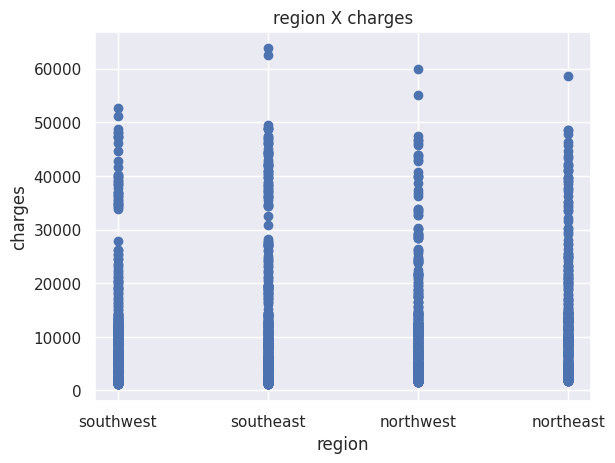

In [ ]:
for feature in data.drop(["charges"], axis=1):
  plt.scatter(data[feature], data["charges"])
  plt.title(f'{feature} X charges')
  plt.xlabel(feature)
  plt.ylabel("charges")
  plt.show()

# Pré-processamento de dados



*   Realize a limpeza de dados, tratando valores ausentes(se necessário)
*   Converta variaveis categóricas em formatos adequados para modelagem



In [ ]:
#Utilizando LabelEncoder para subistituir valores categóricos simples (SIM OU NÃO, MASCULINO OU FEMININO) para números
label_encoder = LabelEncoder()

data_cleaned = data.copy()
data_cleaned["sex"] = label_encoder.fit_transform(data["sex"])
data_cleaned["smoker"] = label_encoder.fit_transform(data["smoker"])
data_cleaned["region"] = label_encoder.fit_transform(data["region"])
data_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


# Modelagem


*   Divida o conjunto de dados em conjuntos de treinamento e teste
*   Crie um modelo preditivo de regressão utilizando uma técnica à sua escolha (ex: Regressão Linear, Árvore de Decisão, etc)



In [ ]:
data_cleaned.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [ ]:
data_cleaned = data_cleaned.drop(["sex", "children", "region"], axis =1)

In [ ]:
data_cleaned.corr()

,age,bmi,smoker,charges
age,1.000000,0.109272,-0.025019,0.299008
bmi,0.109272,1.000000,0.003750,0.198341
smoker,-0.025019,0.003750,1.000000,0.787251
charges,0.299008,0.198341,0.787251,1.000000


In [ ]:
#Removendo target
X = data_cleaned.copy()
X.drop(["charges"], axis=1, inplace=True)

#Separando target das features
y = data_cleaned.copy()[["charges"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [ ]:
columns = ["age", "bmi", "smoker"]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train = pd.DataFrame(data=X_train_scaled, columns=columns)
X_test = pd.DataFrame(data=X_test_scaled, columns=columns)

# Modelo de Regressão Linear Multipla

In [ ]:
#Preparando o nosso modelo com Regressão Linear
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_regression_predicts = linear_regression.predict(X_test)

In [ ]:
#A fazer: Exibir em gráfico a distancia entre os campos previsto e os pontos reais
#A fazer: Testar outro algoritmo de regressão e comprar os resultados
linear_regression_score = r2_score(y_test, linear_regression_predicts)
linear_regression_error = mean_absolute_error(y_test, linear_regression_predicts)
linear_regression_squared_error = np.sqrt(mean_squared_error(y_test, linear_regression_predicts))

In [ ]:
print(f'Linear Regression Score: {linear_regression_score}')
print(f'Linear Regression Error: {linear_regression_error}')
print(f'Linear Regression Squared Error: {linear_regression_squared_error}')

Linear Regression Score: 0.7242584996146338
Linear Regression Error: 4219.564453520838
Linear Regression Squared Error: 6187.2451379709455


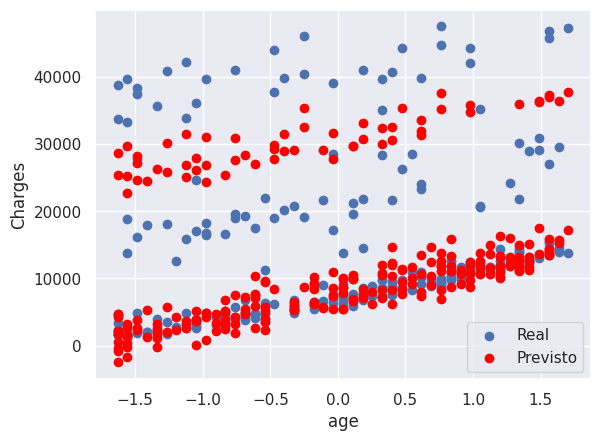

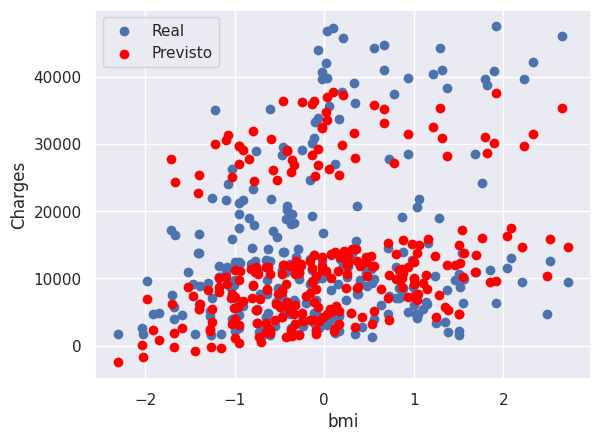

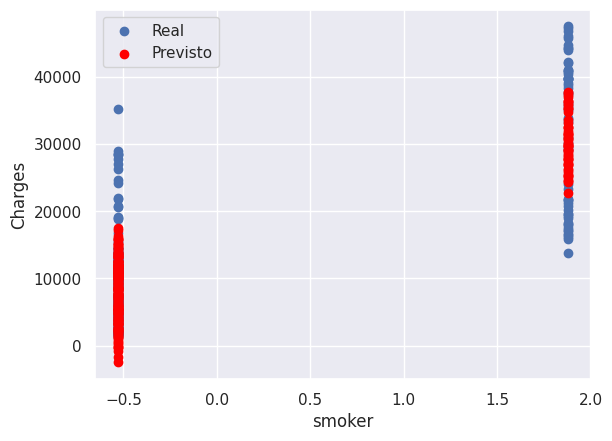

In [ ]:
for feature in X_test:
  generate_scatter_plot(X_test[feature], y_test, feature, "Charges", linear_regression_predicts)

# Modelo de Arvore de Decisão

In [ ]:
def generate_decision_tree(depth, x, y):
  decision_tree = DecisionTreeRegressor(max_depth=depth)
  decision_tree.fit(x, y)
  return decision_tree

In [ ]:
scores = []
for depth in range(1,6):
  model = generate_decision_tree(depth, X_train, y_train)
  predict = model.predict(X_test)
  result = mean_absolute_error(y_test, predict)
  scores.append(result)

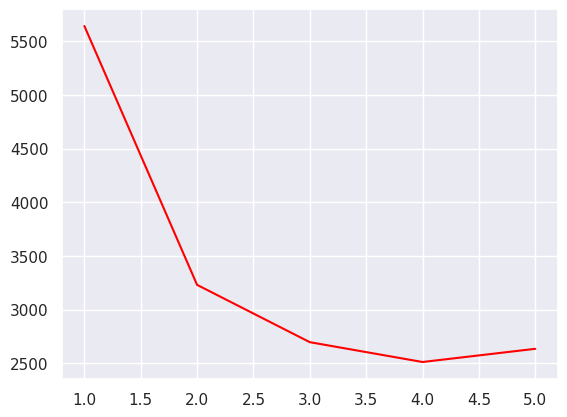

In [ ]:
plt.plot(range(1,6), scores, color="red")
plt.show()

In [ ]:
#Após definir qual a melhor quantidade de profunidade para nossa arvore, vamos escolher o melhor parametro para fazer as predições
decision_tree = generate_decision_tree(4, X_train, y_train)
decision_tree_predicts = decision_tree.predict(X_test)

decision_tree_score = r2_score(y_test, decision_tree_predicts)
decision_tree_error = mean_absolute_error(y_test, decision_tree_predicts)
decision_tree_squared_error = np.sqrt(mean_squared_error(y_test, decision_tree_predicts))

In [ ]:
print(f'Decision Tree Score: {decision_tree_score}')
print(f'Decision Tree Error: {decision_tree_error}')
print(f'Decision Tree Squared Error: {decision_tree_squared_error}')

Decision Tree Score: 0.8390159738139655
Decision Tree Error: 2511.809759019396
Decision Tree Squared Error: 4727.566519085883


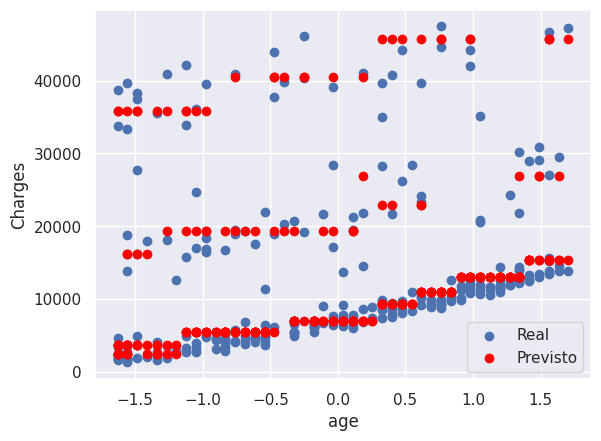

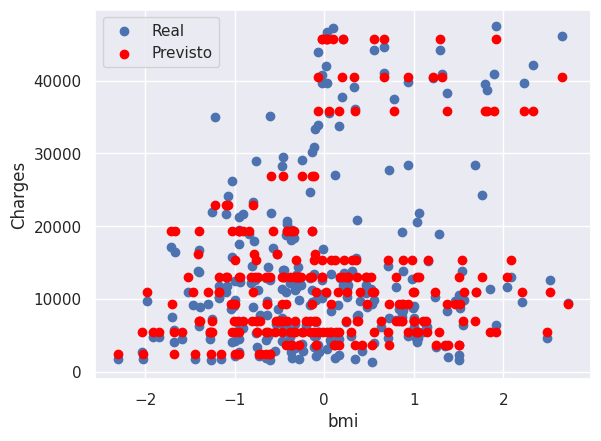

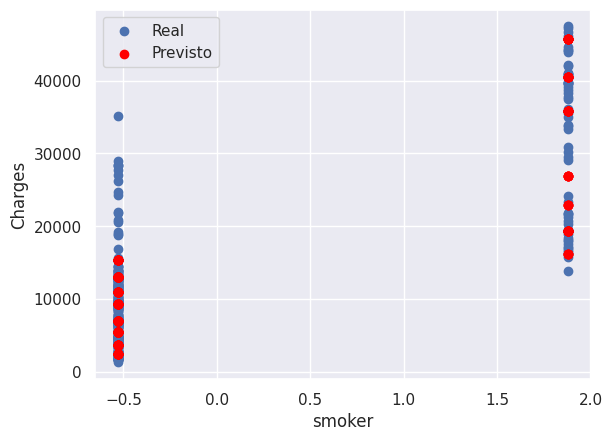

In [ ]:
for feature in X_test:
  generate_scatter_plot(X_test[feature], y_test, feature, "Charges", decision_tree_predicts)

# Modelo KNN

In [ ]:
def generate_knn_model(neighbors, x, y):
  knn = KNeighborsRegressor(n_neighbors=neighbors)
  knn.fit(x, y)
  return knn

In [ ]:
knn_results = []
for neighbors in range(1,20):
  knn = generate_knn_model(neighbors, X_train, y_train)
  predict = knn.predict(X_test)
  error = mean_absolute_error(y_test, predict)
  knn_results.append(error)

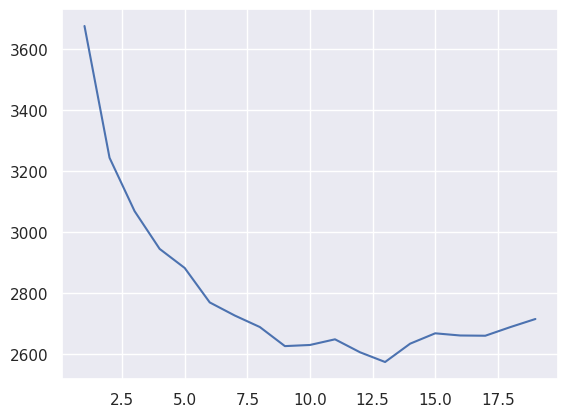

In [ ]:
plt.plot(range(1,20), knn_results)
plt.show()

In [ ]:
#Após definir qual a melhor quantidade de vizinhos para nosso K, vamos escolher o melhor parametro para fazer as predições
knn = generate_knn_model(13, X_train, y_train)
knn_predicts = knn.predict(X_test)

knn_score = r2_score(y_test, knn_predicts)
knn_error = mean_absolute_error(y_test, knn_predicts)
knn_squared_error = np.sqrt(mean_squared_error(y_test, knn_predicts))

In [ ]:
print(f'KNN Score: {knn_score}')
print(f'KNN Error: {knn_error}')
print(f'KNN Squared Error: {knn_squared_error}')

KNN Score: 0.8301970577499105
KNN Error: 2575.1718705014355
KNN Squared Error: 4855.3312154974665


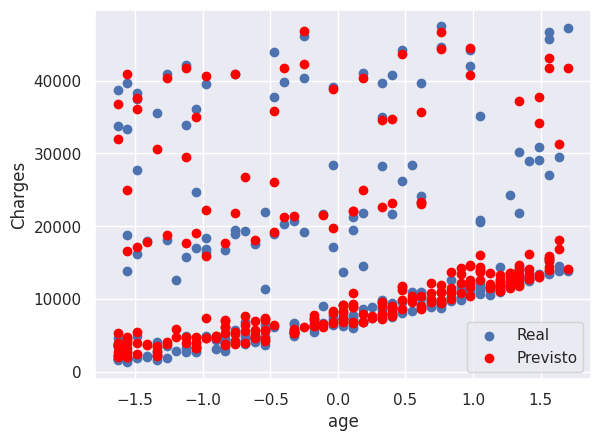

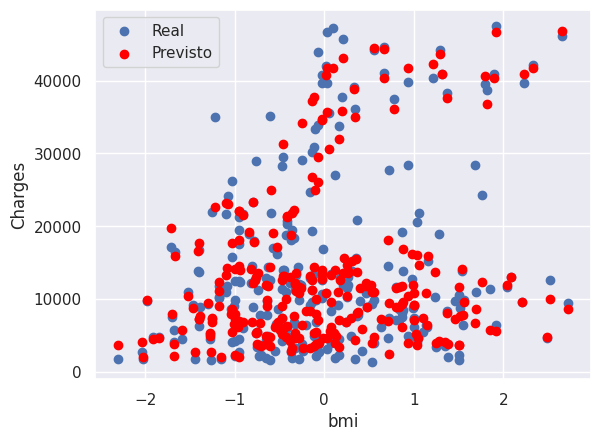

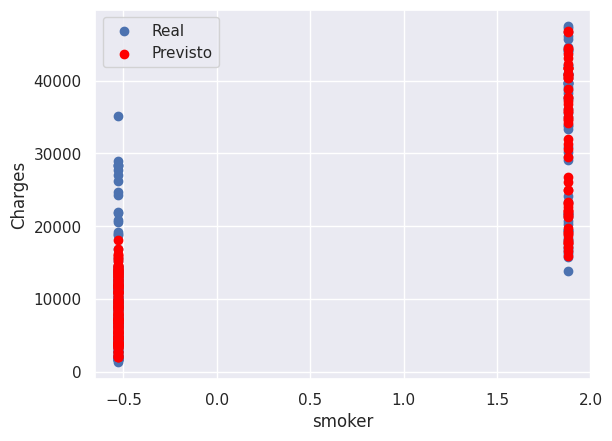

In [ ]:
for feature in X_test:
  generate_scatter_plot(X_test[feature], y_test, feature, "Charges", knn_predicts)

# Validação estatística

In [ ]:
print(f'Erro Regressão Linear: {linear_regression_squared_error}')
print(f'Erro Arvore de Decisão: {decision_tree_squared_error}')
print(f'Erro KNN: {knn_squared_error}')
print("---------------")
print(f'Score Regressão Linear: {linear_regression_score}')
print(f'Score Arvore de Decisão: {decision_tree_score}')
print(f'Score KNN: {knn_score}')

Erro Regressão Linear: 6187.2451379709455
Erro Arvore de Decisão: 4727.566519085883
Erro KNN: 4855.3312154974665
---------------
Score Regressão Linear: 0.7242584996146338
Score Arvore de Decisão: 0.8390159738139655
Score KNN: 0.8301970577499105


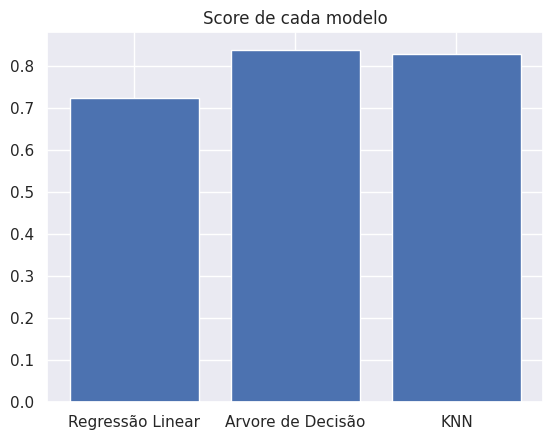

In [ ]:
x_axis = ["Regressão Linear", "Arvore de Decisão", "KNN"]
y_axis = [linear_regression_score, decision_tree_score, knn_score]
plt.bar(x_axis, y_axis)
plt.title("Score de cada modelo")
plt.show()

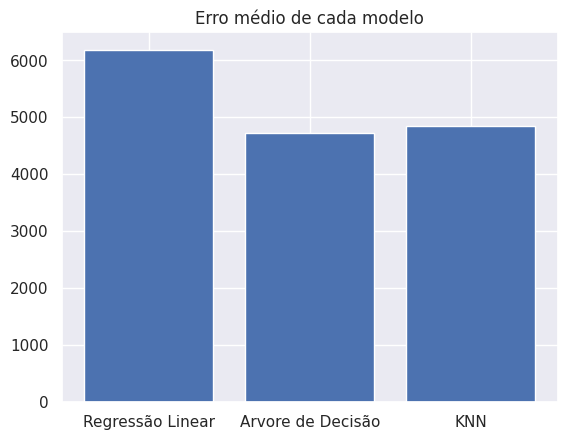

In [ ]:
x_axis = ["Regressão Linear", "Arvore de Decisão", "KNN"]
y_axis = [linear_regression_squared_error, decision_tree_squared_error, knn_squared_error]
plt.bar(x_axis, y_axis)
plt.title("Erro médio de cada modelo")
plt.show()